# **SVM Classification in R on Social Network Ad**

## **Importing the dataset**

In [1]:
ds = read.csv('/content/Social_Network_Ads.csv')
cat("First three rows of dataset", "\n")
head(ds)

First three rows of dataset 


,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


In [2]:
ds = ds[3:5]

## **Visualizing the data**

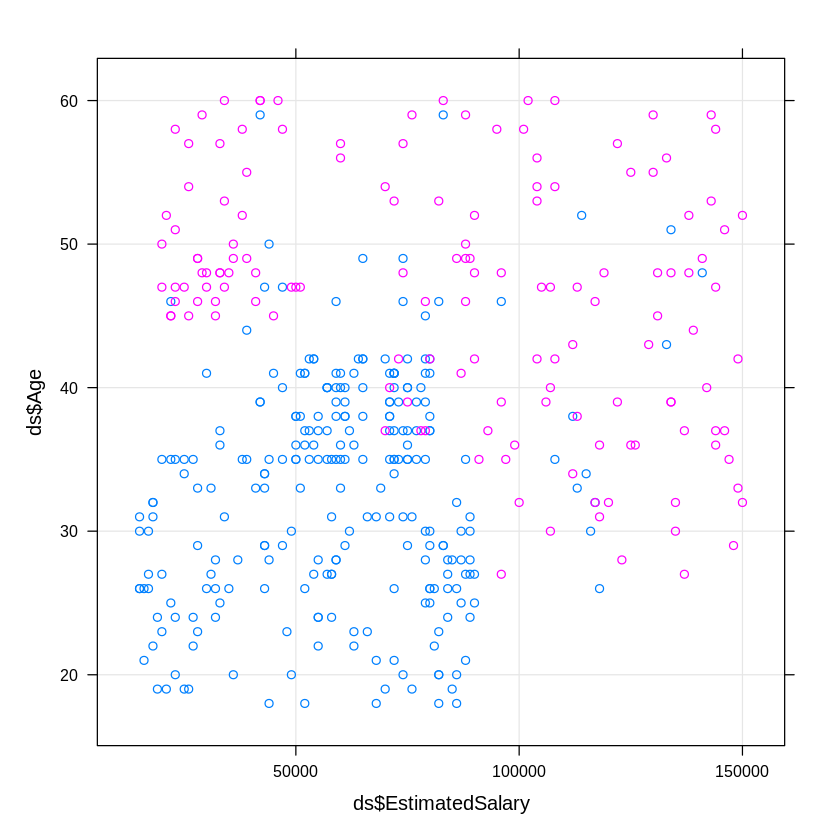

In [3]:
library(lattice)
xyplot(ds$Age ~ ds$EstimatedSalary, group=ds$Purchased, grid=TRUE, asp=1)

## **Splitting the dataset into the Train set and Test set**

In [4]:
ds$Purchased = factor(ds$Purchased, levels = c(0, 1))

In [5]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Purchased, SplitRatio = 0.75)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
head(train_set)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




,Age,EstimatedSalary,Purchased
,<int>,<int>,<fct>
1,19,19000,0
3,26,43000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
10,35,65000,0


In [6]:
head(test_set)

,Age,EstimatedSalary,Purchased
,<int>,<int>,<fct>
2,35,20000,0
4,27,57000,0
5,19,76000,0
9,25,33000,0
12,26,52000,0
18,45,26000,1


## **Feature Scaling**

In [7]:
train_set[-3] = scale(train_set[-3])
test_set[-3] = scale(test_set[-3])
head(train_set)

,Age,EstimatedSalary,Purchased
,<dbl>,<dbl>,<fct>
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


In [8]:
head(test_set)

,Age,EstimatedSalary,Purchased
,<dbl>,<dbl>,<fct>
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


## **Fitting Linear Kernel SVM to the Training set**

In [9]:
install.packages('e1071') # OR, install.packages('kernlab')
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




   y_pred
     0  1
  0 57  7
  1 13 23

## **Evaluation Metrics**

In [10]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
accuracy 
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

[1] 0.8

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.8142857,0.8906250,0.8507463
1,0.7666667,0.6388889,0.6969697


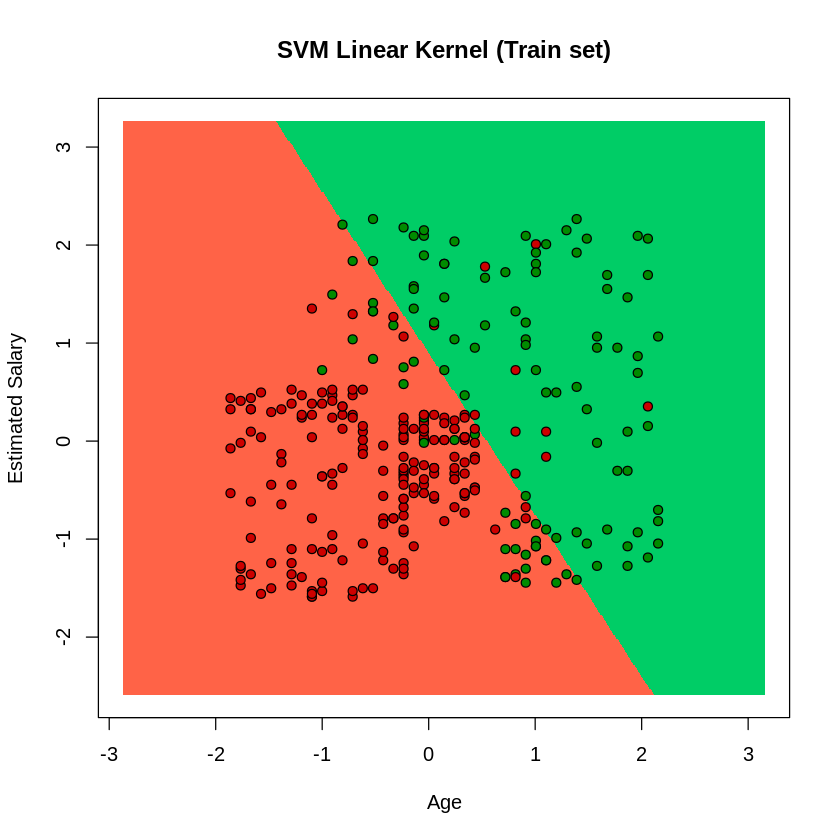

In [11]:
# Visualising the Training set results
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM Linear Kernel (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

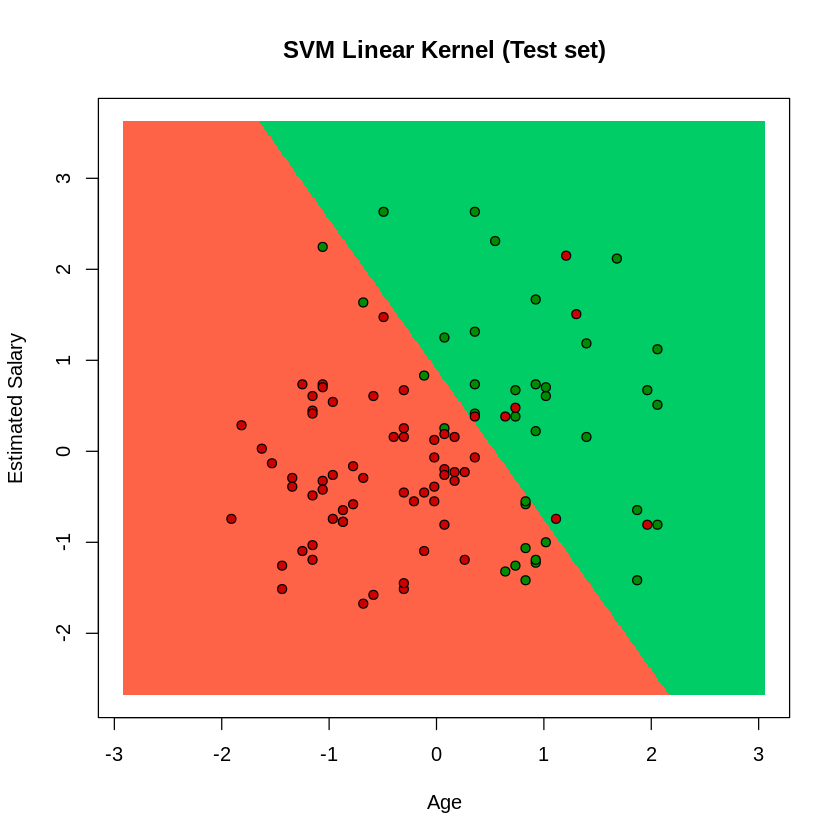

In [12]:
# Visualising the Test set results
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Linear Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

## **Fitting Radial Kernel SVM to the Training set**

In [13]:
# Fitting Kernel SVM to the Training set
# install.packages('e1071') # OR, install.packages('kernlab')
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'radial')
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 58  6
  1  4 32

In [14]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
accuracy 

[1] 0.9

In [15]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.9354839,0.9062500,0.9206349
1,0.8421053,0.8888889,0.8648649


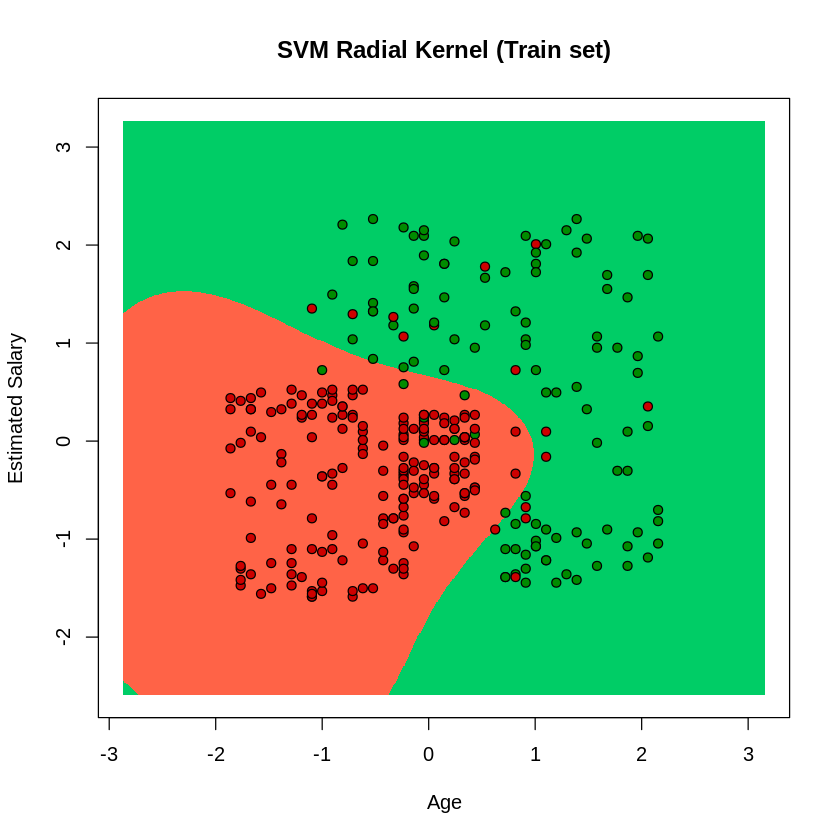

In [16]:
# Visualising the Training set results
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM Radial Kernel (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

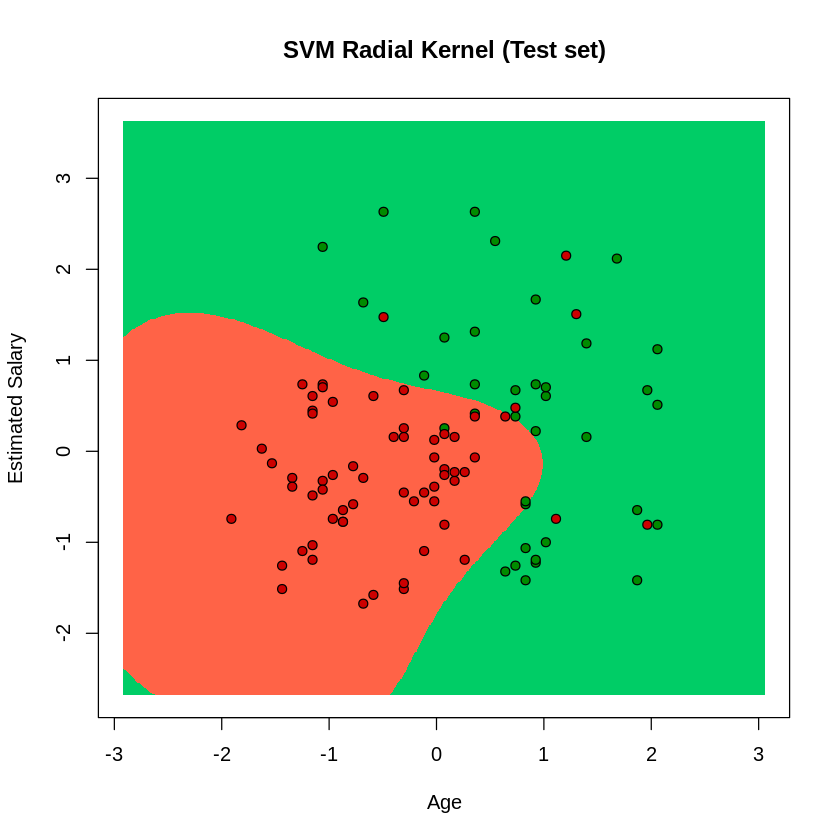

In [17]:
# Visualising the Test set results
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Radial Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

## **Fitting Sigmoid Kernel SVM to the Training set**

In [18]:
# Fitting Kernel SVM to the Training set
# install.packages('e1071') # OR, install.packages('kernlab')
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'sigmoid')
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 53 11
  1 14 22

In [19]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
accuracy 

[1] 0.75

In [20]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.7910448,0.8281250,0.8091603
1,0.6666667,0.6111111,0.6376812


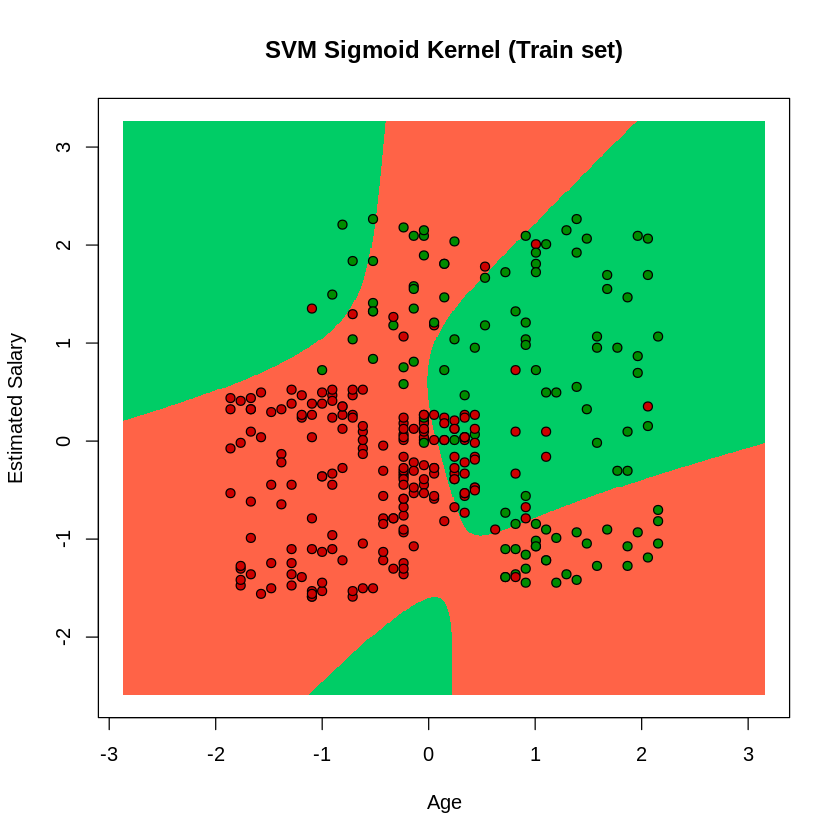

In [21]:
# Visualising the Training set results
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM Sigmoid Kernel (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

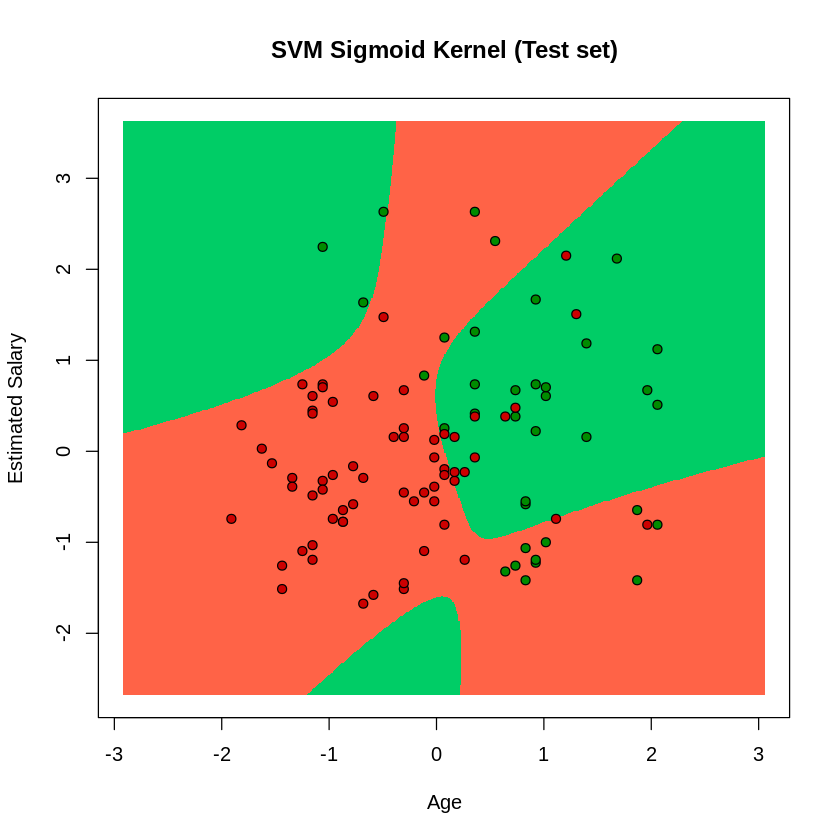

In [22]:
# Visualising the Test set results
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Sigmoid Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

## **Fitting Polynomial Kernel SVM to the Training set**

### **Polynomial (degree = 2)**

In [23]:
# install.packages('e1071') # OR, install.packages('kernlab')
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'polynomial',
                 degree = 2, #parameter needed for kernel of type polynomial (default: 3)
                 gamma = 0.5) # parameter needed for all kernels except linear (default: 1/(data dimension))
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 19 17

In [24]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
accuracy 

[1] 0.74

In [25]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.7500000,0.8906250,0.8142857
1,0.7083333,0.4722222,0.5666667


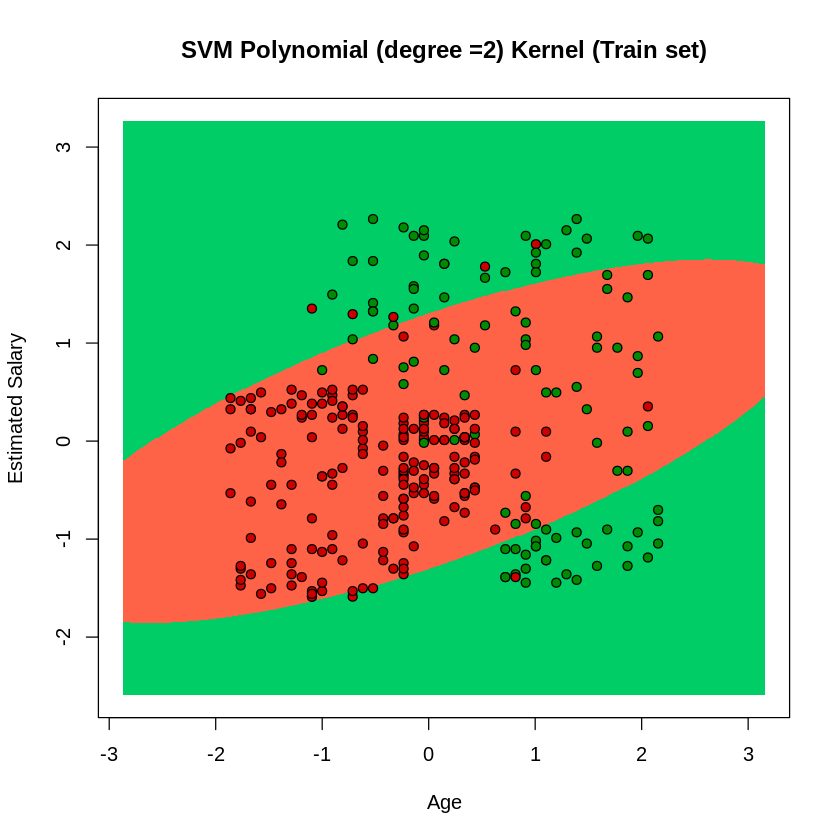

In [26]:
# Visualising the Training set results
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM Polynomial (degree =2) Kernel (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

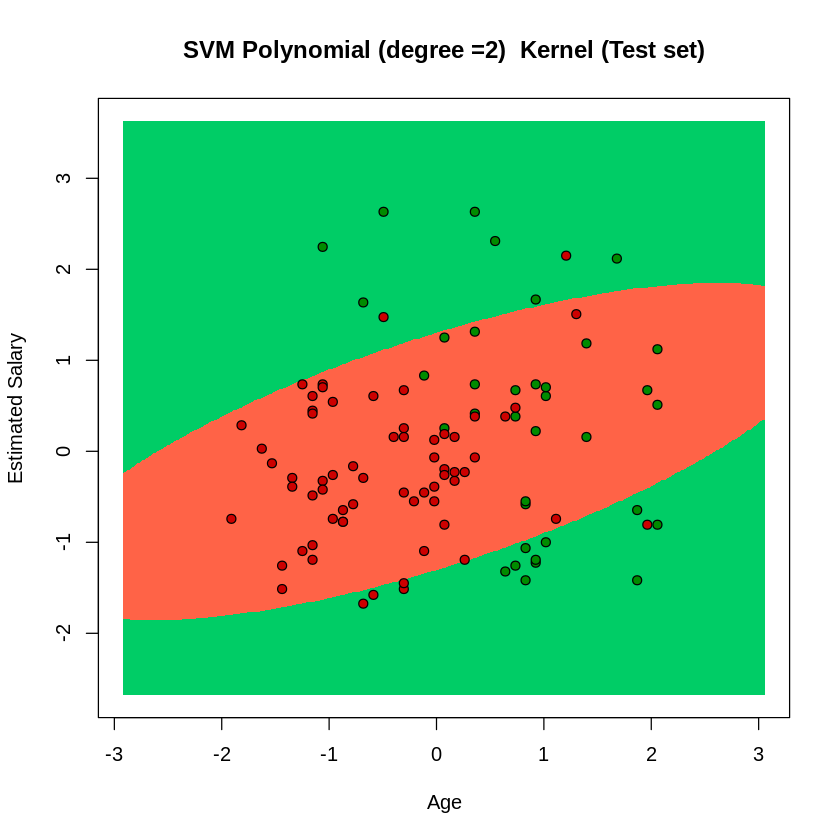

In [27]:
# Visualising the Test set results
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Polynomial (degree =2)  Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

### **Polynomial (degree = 3)**

In [28]:
classifier = svm(formula = Purchased ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'polynomial',
                 degree = 3, #parameter needed for kernel of type polynomial (default: 3)
                 gamma = 0.5) # parameter needed for all kernels except linear (default: 1/(data dimension))

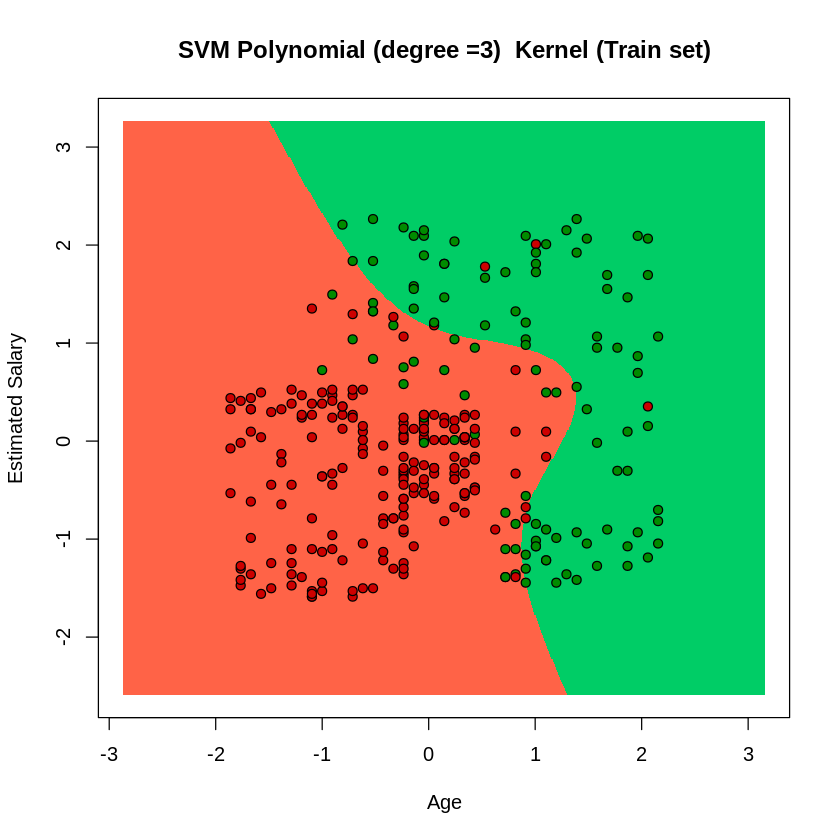

In [29]:
# Visualising the Training set results
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM Polynomial (degree =3)  Kernel (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

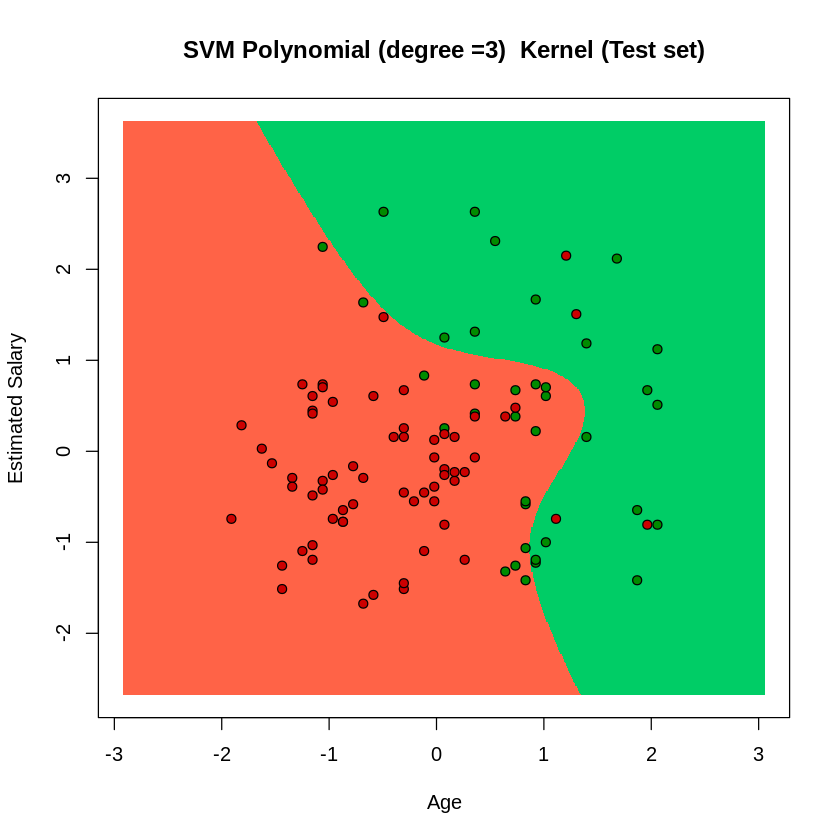

In [30]:
# Visualising the Test set results
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Polynomial (degree =3)  Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

### **Polynomial (degree = 4)**

In [31]:
classifier = svm(formula = Purchased ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'polynomial',
                 degree = 4, #parameter needed for kernel of type polynomial (default: 3)
                 gamma = 0.5) # parameter needed for all kernels except linear (default: 1/(data dimension))

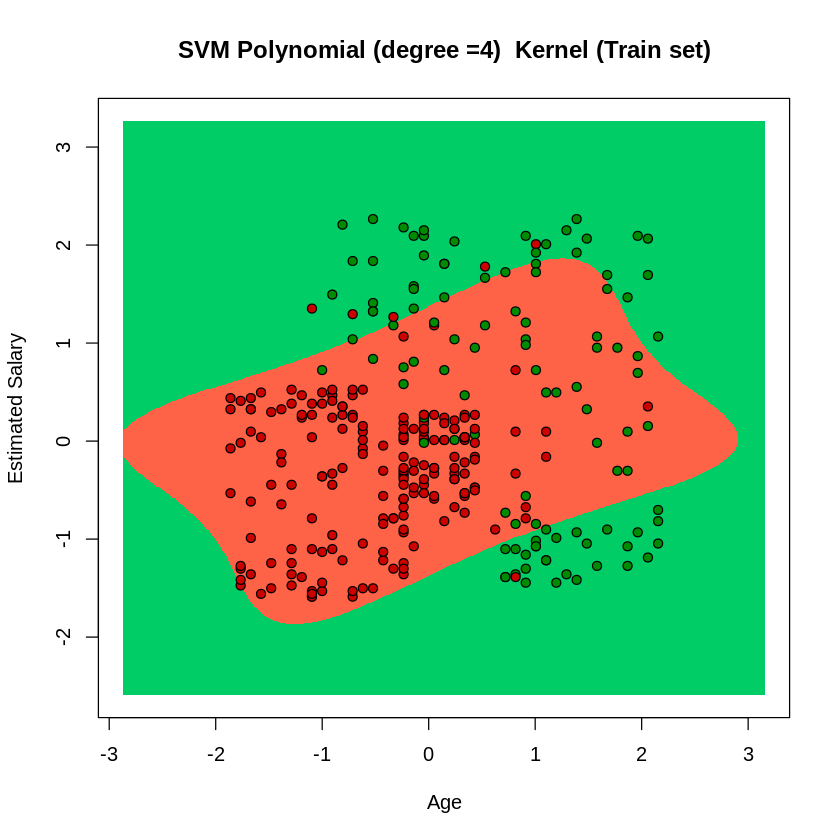

In [32]:
# Visualising the Training set results
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM Polynomial (degree =4)  Kernel (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

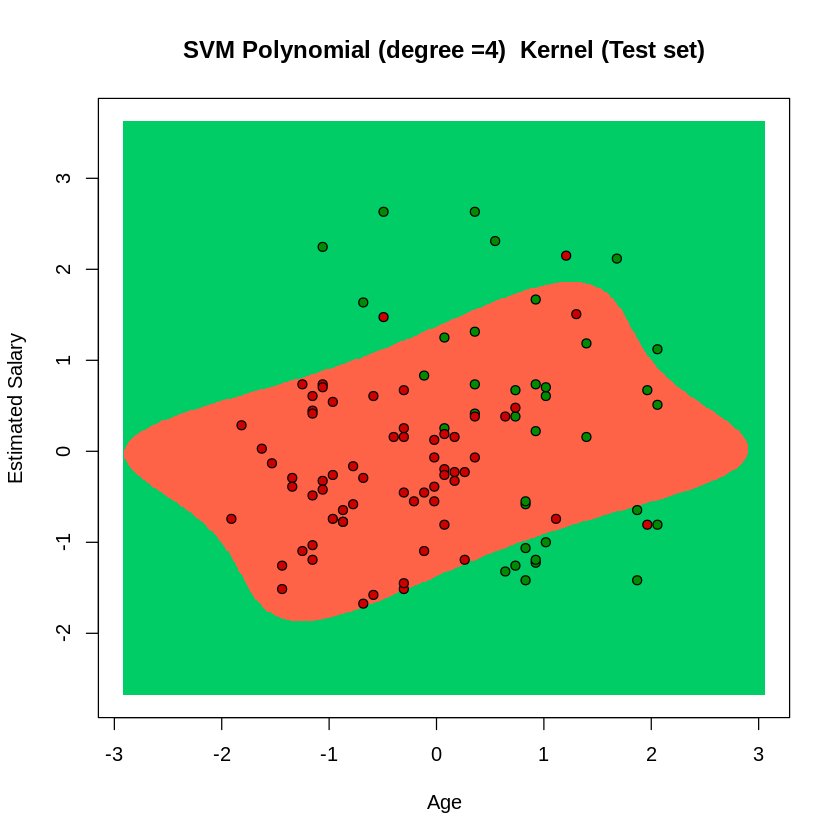

In [33]:
# Visualising the Test set results
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Polynomial (degree =4)  Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [34]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 61  3
  1 19 17

In [35]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
accuracy 

[1] 0.78

In [36]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.7625,0.9531250,0.8472222
1,0.8500,0.4722222,0.6071429


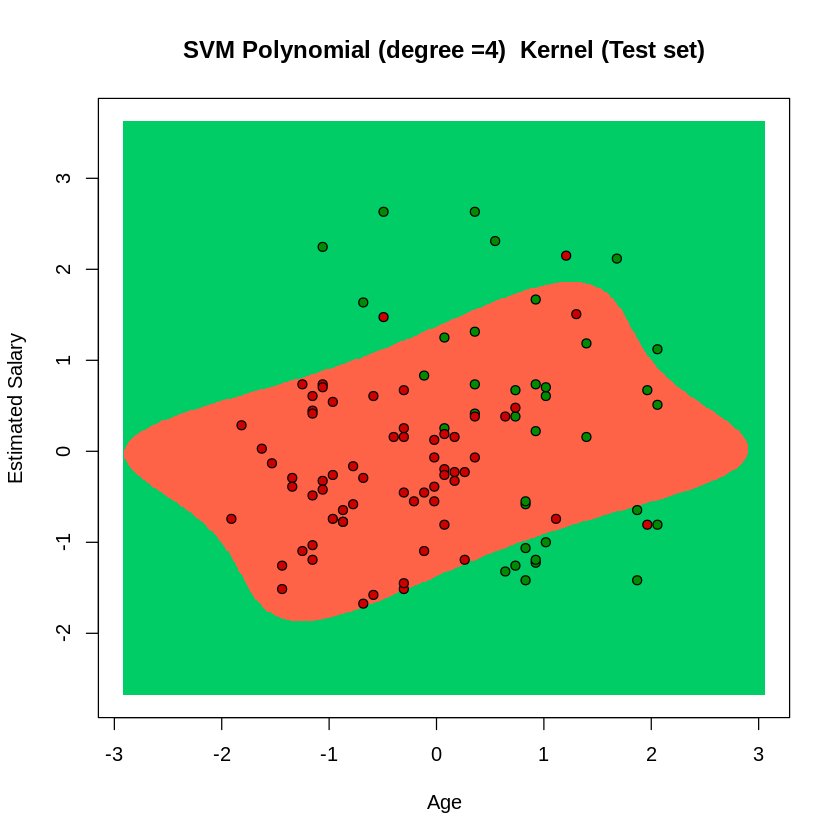

In [37]:
# Visualising the Test set results
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM Polynomial (degree =4)  Kernel (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))

points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))